<h2 style="color: green;"> INDEX </h2>


[Smart Cart. Part 5](#5)

- [Market Basket Analysis](#5)
- [Recommendation](#6)

<a id='INDEX'></a>

In this notebook it is performed Market Basket Analysis.

The goal of the market basket analysis is to analyze customer purchasing patterns. By identifying frequently bought together items, analyzing reorder patterns, and understanding product affinities, the company understands better its customer, increase sales by upselling the cross-sold items and therefore increases profit.

### Smart Cart. Part 5
<a id='5'></a>

In this **Market Basket** analysis I employed  *Apriori* algorithm for association rule mining to discover product association rules. These rules can help in understanding which products are often purchased together.

In [1]:
# Import required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get rid of warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import scipy as sp

print("NumPy Version:", np.__version__)
print("SciPy Version:", sp.__version__)

NumPy Version: 1.26.3
SciPy Version: 1.11.4


In [3]:
# Download the final train orders version of our dataframe - combined train dataset:
df = pd.read_csv('data/df_train.csv')
df.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,4,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,47901,14,16.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,2993,15,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,41425,4,14.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,187205,5,30.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
5,2445303,49302,2,1,199120,49,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
6,2853065,49302,12,1,145852,7,15.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
7,3231517,49302,6,1,63189,42,7.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
8,1,11109,2,1,112108,4,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
9,68474,11109,8,1,67333,14,4.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs


Clean and transform the data. 
Dropping unnecessary columns to focus on relevant information:

In [4]:
# Drop aisle_id and department_id columns:
df = df.drop(['add_to_cart_order', 'reordered', 'aisle_id', 'department_id','aisle','department','product_id','user_id', 'days_since_prior_order', 'order_number'], axis=1)
df

,order_id,product_name
0,1,Bulgarian Yogurt
1,816049,Bulgarian Yogurt
2,1242203,Bulgarian Yogurt
3,1383349,Bulgarian Yogurt
4,1787378,Bulgarian Yogurt
...,...,...
1384612,3420011,Sprinkles Decors
1384613,3420084,Classic Original Lip Balm SPF 12
1384614,3420084,Goats Milk & Chai Soap
1384615,3420088,Stevia Sweetener


The data set is ready for transforming.

Every line represents one item bought in an order. It would be good to group items into orders:

In [5]:
basket_series = df.groupby('order_id')['product_name'].apply(list)
basket_series

order_id
1          [Bulgarian Yogurt, Organic 4% Milk Fat Whole M...
36         [Grated Pecorino Romano Cheese, Spring Water, ...
38         [Shelled Pistachios, Organic Biologique Limes,...
96         [Roasted Turkey, Organic Cucumber, Organic Gra...
98         [Bag of Organic Bananas, Organic Raspberries, ...
                                 ...                        
3421049    [Organic Baby Broccoli, Organic Whole Grain Wh...
3421056    [Sparkling Lemon Water, Total Plain Greek Stra...
3421058    [White Giant Paper Towel Rolls, Sweet Potatoes...
3421063    [Organic Half & Half, Natural Artesian Water, ...
3421070    [Organic Unsweetened Almond Milk, Creamy Peanu...
Name: product_name, Length: 131209, dtype: object

Here we have a series of lists where th eindex of every list is its transaction id.

In [6]:
# Import TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Transform our basket series into a transaction matrix
te = TransactionEncoder()
transaction_matrix = te.fit_transform(basket_series, sparse=True)
transaction_matrix

<131209x39123 sparse matrix of type '<class 'numpy.bool_'>'
	with 1384617 stored elements in Compressed Sparse Row format>

In [7]:
# Convert to dataframe
transaction_df = pd.DataFrame.sparse.from_spmatrix(transaction_matrix, 
                                                  columns = te.columns_)
transaction_df.head()

,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,+Energy Black Cherry Vegetable & Fruit Juice,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Sweet Cinnamon Bunches Cereal,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create a dataframe with frequently bought items by only including products present in over 1% of orders. 

This filtering helps us concentrate on the most important products and streamlines our analysis.

In [8]:
# Apply the Apriori algorithm to find frequent itemsets in the dataset

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True, max_len = 3)
freq_itemsets.sort_values('support', ascending=False)

,support,itemsets
5,0.142719,(Banana)
4,0.117980,(Bag of Organic Bananas)
73,0.083028,(Organic Strawberries)
38,0.074568,(Organic Baby Spinach)
29,0.062000,(Large Lemon)
...,...,...
115,0.010281,"(Organic Avocado, Large Lemon)"
72,0.010228,(Organic Sticks Low Moisture Part Skim Mozzare...
102,0.010175,(Whole Milk)
109,0.010144,"(Limes, Banana)"


The itemset (Banana) with a support of 0.142719 indicates that bananas are the most commonly purchased item, appearing in about 14.27% of all transactions.

(Bag of Organic Bananas) with a support of 0.117980 shows that this item is also very popular, appearing in about 11.80% of transactions.

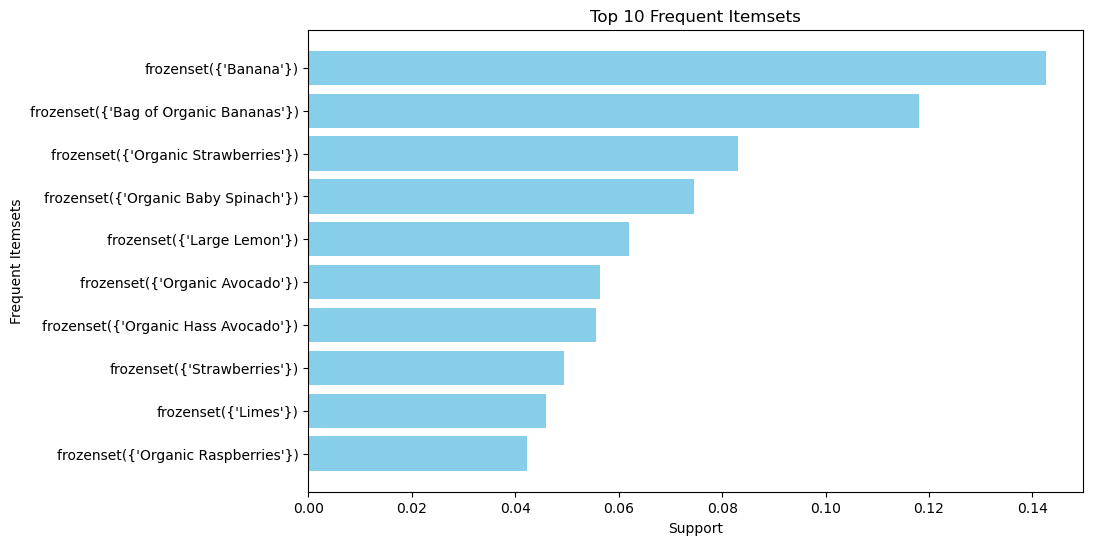

In [15]:
#Plotting
# Sort frequent itemsets by support in descending order
freq_itemsets_sorted = freq_itemsets.sort_values(by='support', ascending=False)

# Create a bar plot for the top N frequent itemsets (adjust N as needed)
N = 10  # Number of top frequent itemsets to display
top_freq_itemsets = freq_itemsets_sorted.head(N)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_freq_itemsets['itemsets'].astype(str), top_freq_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Top {} Frequent Itemsets'.format(N))
plt.gca().invert_yaxis() 

The predominant items on this list primarily consist of fruits, including Bananas, Organic Bananas, Organic Strawberries, Lemons, and Avocado. Additionally, Organic Baby Spinach is another frequently occurring item within the item sets.

Identify which products are bought together:

In [9]:
# Generate association rules from the frequent itemsets

rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(Limes),(Large Lemon),0.045980,0.062000,0.012156,0.264379,4.264159,0.009305,1.275113,0.802381
20,(Large Lemon),(Limes),0.062000,0.045980,0.012156,0.196066,4.264159,0.009305,1.186690,0.816085
31,(Organic Strawberries),(Organic Raspberries),0.083028,0.042268,0.012728,0.153295,3.626710,0.009218,1.131128,0.789847
30,(Organic Raspberries),(Organic Strawberries),0.042268,0.083028,0.012728,0.301118,3.626710,0.009218,1.312056,0.756233
23,(Large Lemon),(Organic Avocado),0.062000,0.056467,0.010281,0.165827,2.936692,0.006780,1.131099,0.703071
22,(Organic Avocado),(Large Lemon),0.056467,0.062000,0.010281,0.182076,2.936692,0.006780,1.146805,0.698948
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.055583,0.117980,0.018444,0.331825,2.812560,0.011886,1.320044,0.682381
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.117980,0.055583,0.018444,0.156331,2.812560,0.011886,1.119416,0.730654
5,(Bag of Organic Bananas),(Organic Raspberries),0.117980,0.042268,0.013566,0.114987,2.720400,0.008579,1.082167,0.716998
4,(Organic Raspberries),(Bag of Organic Bananas),0.042268,0.117980,0.013566,0.320952,2.720400,0.008579,1.298907,0.660318


Antecedents: This is the first item or set of items in the rule. It's what you find in the basket.

Consequents: This is the item or set of items that are likely to be bought together with the antecedents.

Antecedent Support: The proportion of transactions in the dataset that contain the antecedents.

Consequent Support: The proportion of transactions in the dataset that contain the consequents.

Support: The proportion of transactions in the dataset that contain both the antecedents and the consequents. This measures how frequently the rule occurs.

Confidence: The probability of seeing the consequents in transactions given that these transactions also contain the antecedents. It's a measure of the reliability of the rule.

Lift: The ratio of the observed support to that expected if the antecedents and consequents were independent. A lift greater than 1 implies that the presence of the antecedents increases the likelihood of the consequents in transactions.

Leverage: The difference between the observed support and the expected support if the antecedents and consequents were independent. A higher leverage means a stronger association.

Conviction: A higher conviction value suggests a higher degree of dependency between the antecedents and consequents. A value of 1 means no association.

Zhang's Metric: A value to measure the reliability of a rule, where 1 is a perfect prediction.

In [10]:
rules['antecedents'] = rules['antecedents'].apply(lambda x:list(x)).copy()
rules['consequents'] = rules['consequents'].apply(lambda x:list(x)).copy()

There's a strong association between buying <span style="color: #d4af37;">**Organic Bananas**</span>
and <span style="color: green;">**Organic Hass Avocado**</span>.

The lift of 2.81 suggests a stronger association compared to the previous rule. 

The confidence is higher at 33.18%, indicating a stronger tendency to buy Bag of Organic Bananas when Organic Hass Avocado is purchased. 
The higher conviction value indicates a stronger dependency between the purchase of Organic Hass Avocado and Bag of Organic Bananas.
Organic Strawberries and Organic Bananas have moderately strong relationship in the purchase. 

The lift value above 1 indicates that these products are more likely to be bought together than separately. The moderate conviction value suggests some degree of dependency, but not extremely high.


Both rules demonstrate strong associations between the products involved, as indicated by the lift values greater than 1.
These insights are valuable for cross-selling strategies in grocery retail. For example, promotions could be created bundling these items, or they could be shown near each other in the app to encourage joint purchases.

The rules provide a basis for understanding customer purchasing patterns, which can be leveraged for marketing and inventory management.

---

### Recommendation
<a id='R'></a>

The function is designed to recommend a product based on the items in the user's shopping basket and a set of predefined association rules. It uses the concept of market basket analysis, where the likelihood of items being purchased together is used to make recommendations.

Create a recommendation based on the results:

In [21]:
# Input basket - a list containing items that are in the user's shopping basket. 
mybasket = ['Organic Baby Spinach', 'Organic Avocado', 'Limes']

#metric
metric = 'lift'

#Define the recommendation function:
def product_rec(basket, rule, metric):
    
    # Randomly select an item from the basket
    random_item = np.random.choice(basket, 1)[0]
    print(random_item)
    
    # Find rules based on the selected item
    rule_filter = rule['antecedents'].apply(lambda x: x[0]) == random_item
    
    # Sorting and filtering the results
    filtered_df = rule[rule_filter].sort_values(by=metric)
    
    # Making a recommendation. Randomly return one of the top 20 items from the filtered dataframe
    reco = filtered_df.head(20).sample(1)['consequents']
    
    return reco

product_rec(mybasket, rules, metric )
#The function is called with the user's basket, a set of rules, and the metric. 
#It will output a product recommendation based on these inputs.

Limes


21    [Large Lemon]
Name: consequents, dtype: object

<span style="color: #d4af37;">**Large Lemon**</span> was recommended based in the selection of the customer basket.

<img src="https://cdn.vectorstock.com/i/1000x1000/74/51/green-avocado-icon-isolated-on-white-background-vector-29327451.webp" width="300" alt="Markdown Logo is here.">

### Conclusion
<a id='C'></a>

Recommendation algorithm together with the reordered prediction, will help the company to forecast what products a customer is likely to purchase in their next order.

The system suggests products to customers based on their past purchases and the purchases of similar customers.

Recommendations are crucial for increasing sales by suggesting relevant products to customers, thereby enhancing their shopping experience.

This could also be used in targeted marketing, personalized offers, inventory management, and product placement optimizations. Products that are bought together, can be shown or bundled together on the Instacart app.

### [BACK TO INDEX](#INDEX)